In [5]:
import json

cooling_schedules = ["exponential", "bolzmann", "cauchy", "linear", "quadratic", "logarithmic"]


cooling_schedule_data = {}
for cooling_schedule in cooling_schedules:
    with open(f'statistics/{cooling_schedule}_cooling_schedule_test.json', 'r') as file:
        data = json.load(file)
        for parameters, results in data.items():
            if parameters not in cooling_schedule_data.keys():
                cooling_schedule_data[parameters] = results
            else:
                cooling_schedule_data[parameters] += results


In [6]:
import pandas as pd
import numpy as np

mean_initial_solutions = []
all_initial_solutions = []
mean_best_solutions = []
mean_times = []
all_initial_solution_resets = []

for parameters, results in cooling_schedule_data.items():
    mean_initial = sum([result['initial_cost'] for result in results])/len(results)
    all_initial_solutions += [result['initial_cost'] for result in results]
    mean_best = sum([result['best_cost'] for result in results])/len(results)
    mean_time = sum([result['elapsed_time'] for result in results])/len(results)
    mean_initial_solutions.append(mean_initial)
    mean_best_solutions.append(mean_best)
    mean_times.append(mean_time)
    all_initial_solution_resets += [result['initial_solutions_resets'] for result in results]

df = pd.DataFrame(np.array([list(cooling_schedule_data.keys()), mean_initial_solutions, mean_best_solutions, mean_times]).T, columns=['parameters', 'initial_cost', 'best_cost', 'elapsed_time'])

df['initial_cost'] = df['initial_cost'].astype('float')
df['best_cost'] = df['best_cost'].astype('float')
df['cost_diff'] = df['initial_cost'] - df['best_cost']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   parameters    18 non-null     object 
 1   initial_cost  18 non-null     float64
 2   best_cost     18 non-null     float64
 3   elapsed_time  18 non-null     object 
 4   cost_diff     18 non-null     float64
dtypes: float64(3), object(2)
memory usage: 848.0+ bytes


In [18]:
df.sort_values('cost_diff', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,parameters,initial_cost,best_cost,elapsed_time,cost_diff
0,"(30, 0.395, 10, 10)",1972.760,1206.832,27.289879970550537,765.928
1,"(30, 0.434, 10, 10)",1944.064,1311.056,13.523521089553833,633.008
2,"(15, 0.15, 100, 0.01)",1943.312,1381.648,20.68588010787964,561.664
3,"(25, 0.166, 30, 0.995)",1949.472,1414.120,14.097796115875244,535.352
4,"(15, 0.15, 100, 0.02)",1937.848,1427.320,10.804479932785034,510.528
5,"(30, 0.00133, 30, 0.995)",1951.928,1466.984,29.41499423980713,484.944
6,"(50, 5.81, 20, 1)",1912.848,1442.848,30.488000755310058,470.000
7,"(30, 0.483, 10, 10)",1939.608,1470.488,6.604959955215454,469.120
8,"(15, 0.15, 100, 0.005)",1904.808,1440.976,44.256101331710816,463.832
9,"(50, 0.05, 40, 1)",1951.512,1488.744,14.961600036621094,462.768


In [8]:
df.sort_values('cost_diff', ascending=False).tail(10)

,parameters,initial_cost,best_cost,elapsed_time,cost_diff
8,"(15, 0.15, 100, 0.005)",1904.808,1440.976,44.256101331710816,463.832
9,"(50, 0.05, 40, 1)",1951.512,1488.744,14.961600036621094,462.768
10,"(50, 6.32, 20, 1)",1968.208,1528.424,14.816519994735717,439.784
11,"(50, 0.025, 50, 1)",1928.536,1551.320,31.94440170288086,377.216
12,"(25, 2.03, 30, 0.995)",1919.688,1542.560,7.375793981552124,377.128
13,"(50, 0.1, 30, 1)",1960.432,1687.120,7.611681728363037,273.312
14,"(50, 6.93, 20, 1)",1962.608,1692.744,7.525559949874878,269.864
15,"(1000, 0.004, 1, 1)",1966.832,1698.952,7.923479986190796,267.880
16,"(1000, 0.004, 1, 0.22)",1942.144,1728.616,19.241839952468872,213.528
17,"(1000, 0.004, 1, 0.06)",1937.944,1873.160,53.963639993667606,64.784


In [9]:
df.sort_values('best_cost').head()

,parameters,initial_cost,best_cost,elapsed_time,cost_diff
0,"(30, 0.395, 10, 10)",1972.760,1206.832,27.289879970550537,765.928
1,"(30, 0.434, 10, 10)",1944.064,1311.056,13.523521089553833,633.008
2,"(15, 0.15, 100, 0.01)",1943.312,1381.648,20.68588010787964,561.664
3,"(25, 0.166, 30, 0.995)",1949.472,1414.120,14.097796115875244,535.352
4,"(15, 0.15, 100, 0.02)",1937.848,1427.320,10.804479932785034,510.528


In [10]:
df.sort_values('best_cost').tail()

,parameters,initial_cost,best_cost,elapsed_time,cost_diff
13,"(50, 0.1, 30, 1)",1960.432,1687.120,7.611681728363037,273.312
14,"(50, 6.93, 20, 1)",1962.608,1692.744,7.525559949874878,269.864
15,"(1000, 0.004, 1, 1)",1966.832,1698.952,7.923479986190796,267.880
16,"(1000, 0.004, 1, 0.22)",1942.144,1728.616,19.241839952468872,213.528
17,"(1000, 0.004, 1, 0.06)",1937.944,1873.160,53.963639993667606,64.784


In [11]:
df.sort_values('elapsed_time').head()

,parameters,initial_cost,best_cost,elapsed_time,cost_diff
4,"(15, 0.15, 100, 0.02)",1937.848,1427.320,10.804479932785034,510.528
1,"(30, 0.434, 10, 10)",1944.064,1311.056,13.523521089553833,633.008
3,"(25, 0.166, 30, 0.995)",1949.472,1414.120,14.097796115875244,535.352
10,"(50, 6.32, 20, 1)",1968.208,1528.424,14.816519994735717,439.784
9,"(50, 0.05, 40, 1)",1951.512,1488.744,14.961600036621094,462.768


In [12]:
df.sort_values('elapsed_time').tail()

,parameters,initial_cost,best_cost,elapsed_time,cost_diff
7,"(30, 0.483, 10, 10)",1939.608,1470.488,6.604959955215454,469.120
12,"(25, 2.03, 30, 0.995)",1919.688,1542.560,7.375793981552124,377.128
14,"(50, 6.93, 20, 1)",1962.608,1692.744,7.525559949874878,269.864
13,"(50, 0.1, 30, 1)",1960.432,1687.120,7.611681728363037,273.312
15,"(1000, 0.004, 1, 1)",1966.832,1698.952,7.923479986190796,267.880


In [13]:
initial_solution_resets_df = pd.DataFrame(all_initial_solution_resets, columns=['initial_solution_resets'])
initial_solution_resets_df.initial_solution_resets.value_counts()

0    401
1     45
3      2
2      2
Name: initial_solution_resets, dtype: int64

<AxesSubplot:xlabel='initial_solution_resets', ylabel='Count'>

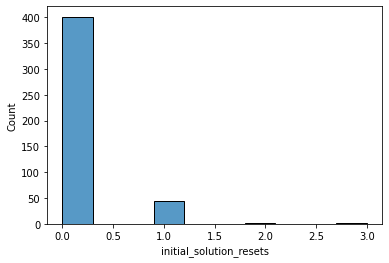

In [14]:
import seaborn as sns

sns.histplot(x='initial_solution_resets', data=initial_solution_resets_df)

In [15]:
initial_solution_resets_df.initial_solution_resets.value_counts(normalize=True)

0    0.891111
1    0.100000
3    0.004444
2    0.004444
Name: initial_solution_resets, dtype: float64

Hipoteza: rozkład resetów rozwiązania początkowego zbiega w nieskończoności(dla dużych liczb) do rozkładu Benforda. https://pl.wikipedia.org/wiki/Rozkład_Benforda
albo to https://en.wikipedia.org/wiki/Zipf%27s_law
ewentualnie jeszcze ten:
https://en.wikipedia.org/wiki/Poisson_distribution

## Rozkład rozwiązań początkowych

<AxesSubplot:ylabel='Count'>

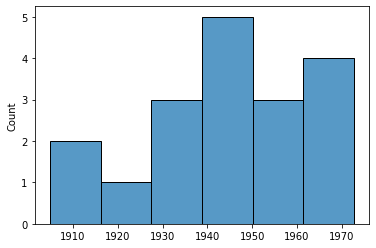

In [16]:
sns.histplot(mean_initial_solutions)

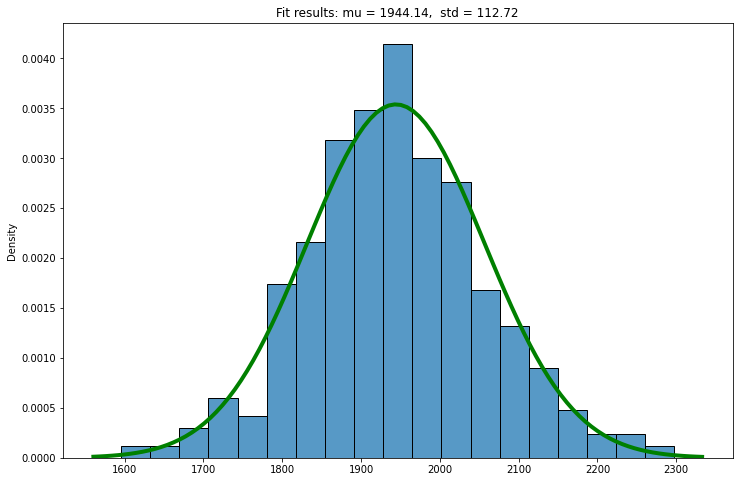

In [17]:
from scipy.stats import norm
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.histplot(all_initial_solutions, stat='density')


mu, std = norm.fit(all_initial_solutions)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'green', linewidth=4)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()